 ## 대표 색상(H고정) 관련 가설검증
 
    최초 작성일 : 2020/03/10
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        설문지(1) 사용 2번 문항
        
        - 설문조사 결과 그래프로 시각화
        
        - 성별에 따른 색상(FixedHue, bright) 인식 차이
        
        - 연령에 따른 색상(FixedHue, bright) 인식 차이
        
        - 패션 관심도에 따른 색상(FixedHue, bright) 인식 차이
        
    < 수정 내용 >
        
        20/03/21
        - definition + need 묶어서 색상(FixedHue, bright) 인식 차이 
        
        20/03/22
        - Sex + Age 묶어서 색상(FixedHue, bright) 인식 차이

# 색상고정, bright

### 설문조사 결과를 토대로 대표 색상 설정

In [3]:
# 데이터 불러오기

hFixed_bright <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/hFixed_bright.csv")
str(hFixed_bright)
head(hFixed_bright)

'data.frame':	684 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ select: Factor w/ 5 levels "-S-V","-S+V",..: 2 4 3 2 2 5 3 4 1 4 ...
 $ class : Factor w/ 6 levels "comp","doubleness1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,select,class,cnt
0,-S+V,comp,1
1,+S+V,comp,1
2,+S-V,comp,1
3,-S+V,comp,1
4,-S+V,comp,1
5,original,comp,1


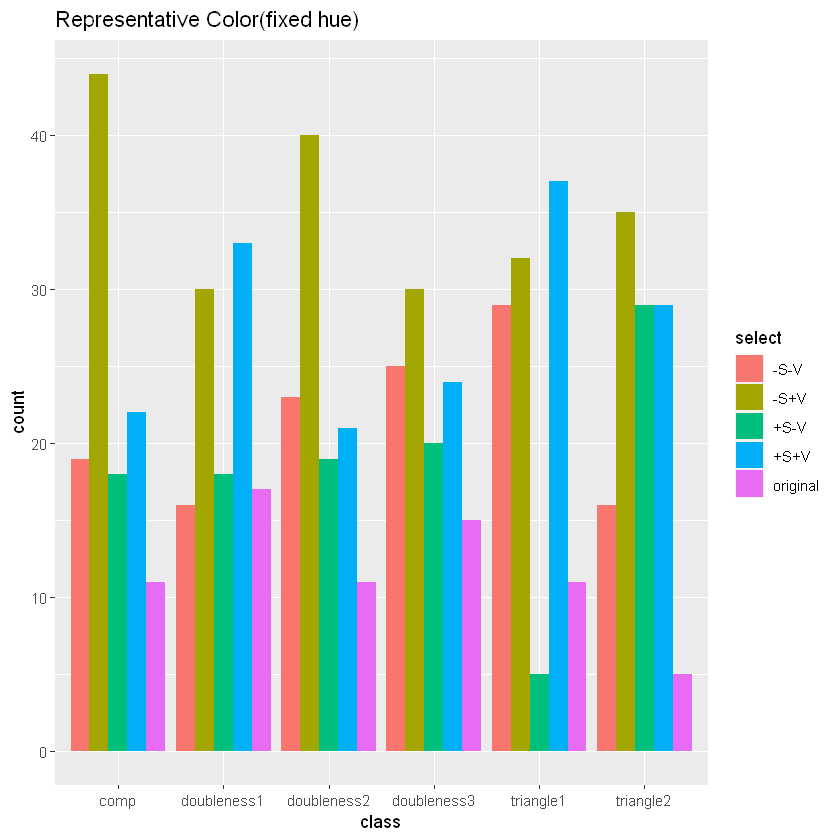

In [4]:
# 그래프로 상태 먼저 확인

# install.packages("ggplot2")
library("ggplot2")

# 각 샘플마다 나눠서 보기
ggplot(hFixed_bright, aes(class, fill=select)) + geom_bar(position="dodge") + labs(title="Representative Color(fixed hue)")
# 원래는 original이 가장 밝게 보여주는 색이지만
# 그래프상으로 봤을때 doub1, tri1을 제외하고 "-S+V"가 많이 선택됐음을 볼 수 있다
# 그래도 전체값을 봐보자

In [21]:
# 전체결과보기 위한 dataframe 새로 만들기
t_sv <- with(hFixed_bright, sum(cnt[select=="-S-V"]))
t_sV <- with(hFixed_bright, sum(cnt[select=="-S+V"]))
t_Sv <- with(hFixed_bright, sum(cnt[select=="+S-V"]))
t_SV <- with(hFixed_bright, sum(cnt[select=="+S+V"]))
t_origin <- with(hFixed_bright, sum(cnt[select=="original"]))

# column 만들기
total <-c(t_sv, t_sV, t_Sv, t_SV, t_origin)

# dataframe 만들기
df_hFixed_bright <- data.frame(total)
rownames(df_hFixed_bright) <- c("-S-V", "-S+V", "+S-V", "+S+V", "origial")
library(tibble)
df_hFixed_bright2 <- rownames_to_column(df_hFixed_bright, var="select")
df_hFixed_bright2

select,total
-S-V,128
-S+V,211
+S-V,109
+S+V,166
origial,70


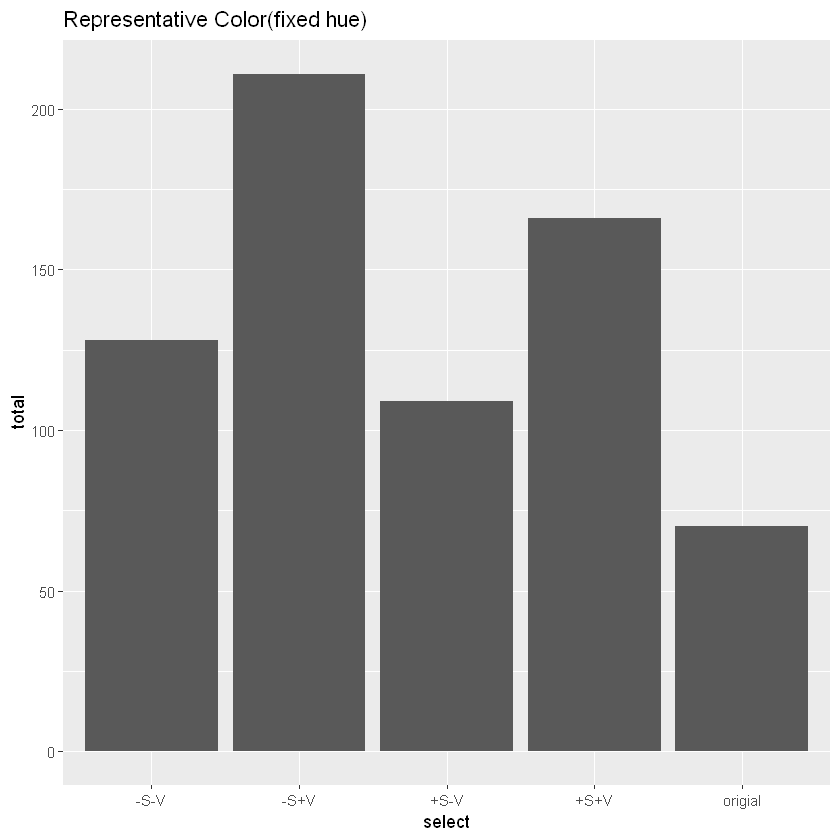

In [6]:
# 전체 결과 그래프로 확인

ggplot(df_hFixed_bright2, aes(x=select, y=total)) + geom_bar(stat="identity") + labs(title="Representative Color(fixed hue)")
# 1. -S+V / 2. +S+V / 3. +S-V 
# 색상고정/bright의 경우, -S+V의 값이 대표 색상값으로 성립

    설문조사 결과를 토대로 
    대표색상(색상고정,bright)은 "-S+V"의 값으로 설정
    (-S+V : 피부색의 보색 원색에서 명도 -5 채도 +5 한 값)
        
    그렇기에 앞으로 분석 방향은
    대표색상 "-S+V"로 설정하여 모든것을 진행할 것

# 전체

### 성별에 따른 대표 색상(색상고정, bright) 인식 차이 

    귀무가설 : 성별에 따라 대표 색상(색상고정, bright) 인식 차이가 없다
    대립가설 : 성별에 따라 대표 색상(색상고정, bright) 인식 차이가 있다
    
    - 대표 색상(색상고정, bright) : -S+V
    - chisq.test 사용

In [1]:
# 데이터 불러오기

S_hFB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/S_hFB_cnt.csv")
str(S_hFB_cnt)
head(S_hFB_cnt)

'data.frame':	684 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex   : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ select: Factor w/ 5 levels "-S-V","-S+V",..: 2 4 3 2 2 5 3 4 1 4 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,select,cnt
0,Male,-S+V,1
1,Female,+S+V,1
2,Female,+S-V,1
3,Female,-S+V,1
4,Female,-S+V,1
5,Female,original,1


In [8]:
## 데이터프레임 재생성

# 남
Male_T <- with(S_hFB_cnt, sum(cnt[sex=="Male" & select == "-S+V"]))
Male_F <- with(S_hFB_cnt, sum(cnt[sex=="Male" & select != "-S+V"]))

# 여
Female_T <- with(S_hFB_cnt, sum(cnt[sex=="Female" & select == "-S+V"]))
Female_F <- with(S_hFB_cnt, sum(cnt[sex=="Female" & select != "-S+V"]))

# column 생성
Male <- c(Male_T, Male_F)
Female <- c(Female_T, Female_F)

# dataframe 만들기
df_S_hFB_cnt <- data.frame(Male, Female)
df_S_hFB_cnt <- t(df_S_hFB_cnt)
colnames(df_S_hFB_cnt) <- c("True", "False")


## 행, 열 각각의 합계 알아보기
addmargins(df_S_hFB_cnt)


## 카이제곱
chisq.test(df_S_hFB_cnt)
# p-value = 0.1913
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 성별에 따라 안면부위 인식 차이가 없음을 알 수 있다

,True,False,Sum
Male,41,115,156
Female,170,358,528
Sum,211,473,684



	Pearson's Chi-squared test with Yates' continuity correction

data:  df_S_hFB_cnt
X-squared = 1.7075, df = 1, p-value = 0.1913


#### 성별에 따라 어떤 색상을 제일 많이 선택했는지 알아보기

In [41]:
# 남
M_sv <- with(S_hFB_cnt, sum(cnt[sex == "Male" & select == "-S-V"]))
M_sV <- with(S_hFB_cnt, sum(cnt[sex == "Male" & select == "-S+V"]))
M_Sv <- with(S_hFB_cnt, sum(cnt[sex == "Male" & select == "+S-V"]))
M_SV <- with(S_hFB_cnt, sum(cnt[sex == "Male" & select == "+S+V"]))
M_origin <- with(S_hFB_cnt, sum(cnt[sex == "Male" & select == "original"]))

# 여
F_sv <- with(S_hFB_cnt, sum(cnt[sex == "Female" & select == "-S-V"]))
F_sV <- with(S_hFB_cnt, sum(cnt[sex == "Female" & select == "-S+V"]))
F_Sv <- with(S_hFB_cnt, sum(cnt[sex == "Female" & select == "+S-V"]))
F_SV <- with(S_hFB_cnt, sum(cnt[sex == "Female" & select == "+S+V"]))
F_origin <- with(S_hFB_cnt, sum(cnt[sex == "Female" & select == "original"]))

# 컬럼
M <- c(M_sv, M_sV, M_Sv, M_SV, M_origin)
F <- c(F_sv, F_sV, F_Sv, F_SV, F_origin)

# dataframe으로 생성
total_sex_HFB <- data.frame(M, F)
total_sex_HFB <- t(total_sex_HFB)
colnames(total_sex_HFB) <- c("-S-V", "-S+V", "+S-V", "+S+V", "original")
library(tibble)
# total_sex_HFB <- colnames_to_column(total_sex_HFB, var="select")
total_sex_HFB

,-S-V,-S+V,+S-V,+S+V,original
M,18,41,31,51,15
F,110,170,78,115,55


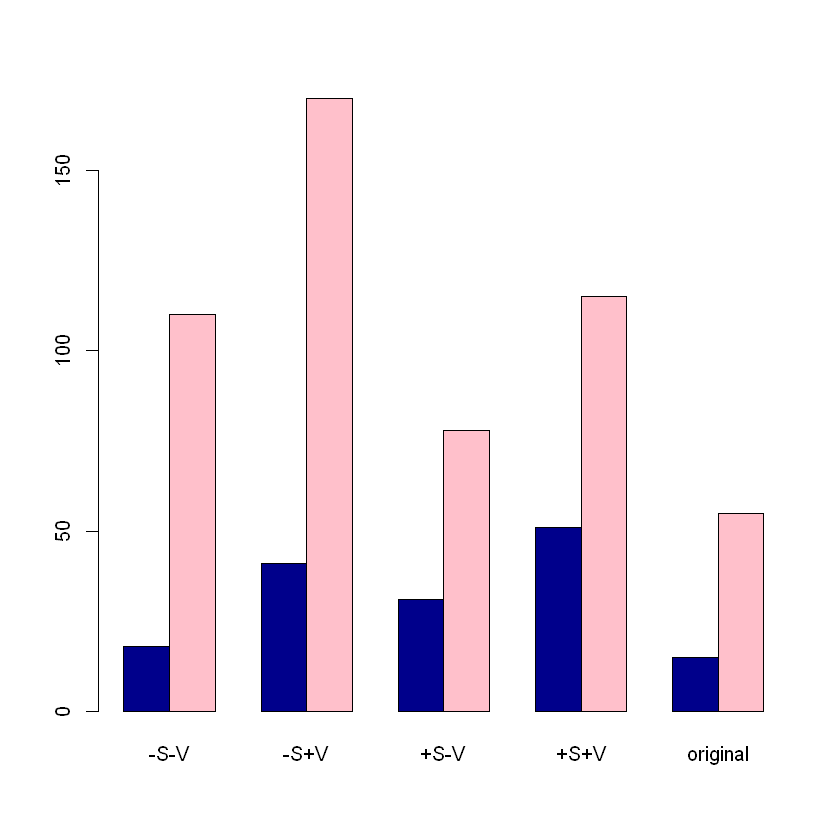

In [42]:
# 시각적으로 나타내기

barplot(total_sex_HFB, col=c("darkblue", "pink"), beside=TRUE)
# 음... 여자 남자 따로 보고싶지만 일단은 이렇게라도 봐보자 나중에 다시 수정할것!!
# 여성 -S+V > +S+V > -S-V
# 남성 +S+V > -S+V > +S-V

### 연령에 따른 대표 색상(색상고정, bright) 인식 차이 

    귀무가설 : 연령에 따라 대표 색상(색상고정, bright) 인식 차이가 없다
    대립가설 : 연령에 따라 대표 색상(색상고정, bright) 인식 차이가 있다
    
    - 대표 색상(색상고정, bright) : -S+V
    - chisq.test 사용

In [51]:
# 데이터 불러오기

A_hFB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/A_hFB_cnt.csv")
str(A_hFB_cnt)
head(A_hFB_cnt)

'data.frame':	684 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ age   : int  20 20 20 20 20 20 20 20 20 20 ...
 $ select: Factor w/ 5 levels "-S-V","-S+V",..: 2 4 3 2 2 5 3 4 1 4 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,age,select,cnt
0,20,-S+V,1
1,20,+S+V,1
2,20,+S-V,1
3,20,-S+V,1
4,20,-S+V,1
5,20,original,1


In [56]:
## 데이터프레임 재생성

teens_T <- with(A_hFB_cnt, sum(cnt[age == "10" & select == "-S+V"]))
teens_F <- with(A_hFB_cnt, sum(cnt[age == "10" & select != "-S+V"]))

twenty_T <- with(A_hFB_cnt, sum(cnt[age == "20" & select == "-S+V"]))
twenty_F <- with(A_hFB_cnt, sum(cnt[age == "20" & select != "-S+V"]))

thirty_T <- with(A_hFB_cnt, sum(cnt[age == "30" & select == "-S+V"]))
thirty_F <- with(A_hFB_cnt, sum(cnt[age == "30" & select != "-S+V"]))

forty_T <- with(A_hFB_cnt, sum(cnt[age == "40" & select == "-S+V"]))
forty_F <- with(A_hFB_cnt, sum(cnt[age == "40" & select != "-S+V"]))

fifty_T <- with(A_hFB_cnt, sum(cnt[age == "50" & select == "-S+V"]))
fifty_F <- with(A_hFB_cnt, sum(cnt[age == "50" & select != "-S+V"]))

teens <- c(teens_T, teens_F)
twenty <- c(twenty_T, twenty_F)
thirty <- c(thirty_T, thirty_F)
forty <- c(forty_T, forty_F)
fifty <- c(fifty_T, fifty_F)
             
df_Age_Region <- data.frame(teens, twenty, thirty, forty, fifty)
df_Age_Region <- t(df_Age_Region)
colnames(df_Age_Region) <- c("True", "False")
# df_Age_Region


## 행, 열 각각의 합계 알아보기

addmargins(df_Age_Region)
# 합계값이 동일하지 않으므로 chisq.test 사용


## 카이제곱

chisq.test(df_Age_Region)
# p-value = 0.2065
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test

fisher.test(df_Age_Region)
# p-value = 0.1838
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다

,True,False,Sum
teens,2,4,6
twenty,190,404,594
thirty,10,44,54
forty,7,11,18
fifty,2,10,12
Sum,211,473,684


Warning message in chisq.test(df_Age_Region):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_Age_Region
X-squared = 5.9034, df = 4, p-value = 0.2065



	Fisher's Exact Test for Count Data

data:  df_Age_Region
p-value = 0.1838
alternative hypothesis: two.sided


#### 연령에 따라 어떤 색상을 제일 많이 선택했는지 알아보기

In [63]:
# 연령에 따른 색상 선택 차이 보기 

A_sv <- c()
A_sV <- c()
A_SV <- c()
A_Sv <- c()
A_origin <- c()

for(i in seq(10, 50, by=10)){
    sv <- with(A_hFB_cnt, sum(cnt[age==i & select=="-S-V"]))
    A_sv[[i/10]] <- sv
    
    sV <- with(A_hFB_cnt, sum(cnt[age==i & select=="-S+V"]))
    A_sV[[i/10]] <- sV
    
    SV <- with(A_hFB_cnt, sum(cnt[age==i & select=="+S+V"]))
    A_SV[[i/10]] <- SV
    
    Sv <- with(A_hFB_cnt, sum(cnt[age==i & select=="+S-V"]))
    A_Sv[[i/10]] <- Sv
    
    origin <- with(A_hFB_cnt, sum(cnt[age==i & select=="original"]))
    A_origin[[i/10]] <- origin
    
    
    Age_hFB <- data.frame(sv=A_sv, sV=A_sV, SV=A_SV, Sv=A_Sv, origin=A_origin)
}


rownames(Age_hFB) <- c("10대", "20대", "30대", "40대", "50대") # 왜 for문 안에선 안먹히냐
# Age_hFB <- rownames_to_column(Age_hFB, var="Age")
Age_hFB <- transform(Age_hFB, sv=as.numeric(sv), sV=as.numeric(sV), SV=as.numeric(SV), Sv=as.numeric(Sv), origin=as.numeric(origin) )
Age_hFB 

,sv,sV,SV,Sv,origin
10대,2,2,1,1,0
20대,107,190,147,87,63
30대,14,10,14,12,4
40대,4,7,2,4,1
50대,1,2,2,5,2


In [ ]:
## 시각적으로 나타내기

### 패션 관심도에 따른 대표 색상(색상고정, bright) 인식 차이 

    귀무가설 : 패션 관심도에 따라 대표 색상(색상고정, bright) 인식 차이가 없다
    대립가설 : 패션 관심도에 따라 대표 색상(색상고정, bright) 인식 차이가 있다
    
    - 대표 색상(색상고정, bright) : -S+V
    - chisq.test 사용

In [58]:
# 데이터 불러오기

I_hFB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/I_hFB_cnt.csv")
str(I_hFB_cnt)
head(I_hFB_cnt)

'data.frame':	684 obs. of  4 variables:
 $ X       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ interest: int  5 5 3 3 4 2 5 3 4 4 ...
 $ select  : Factor w/ 5 levels "-S-V","-S+V",..: 2 4 3 2 2 5 3 4 1 4 ...
 $ cnt     : int  1 1 1 1 1 1 1 1 1 1 ...


X,interest,select,cnt
0,5,-S+V,1
1,5,+S+V,1
2,3,+S-V,1
3,3,-S+V,1
4,4,-S+V,1
5,2,original,1


In [91]:
## 데이터프레임 재생성

I_True <- c()
I_False <- c()

for(i in seq(1,5, by=1)){
    True <- with(I_hFB_cnt, sum(cnt[interest==i & select =="-S+V"]))
    I_True[[(i)]] <- True
    
    False <- with(I_hFB_cnt, sum(cnt[interest==i & select != "-S+V"]))

    I_False[[i]] <- False
   
    
    interest_TF <- data.frame(True=I_True, False=I_False)
}

interest_TF

# 카이제곱

chisq.test(interest_TF)
# p-value = 0.0768
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test

fisher.test(interest_TF)
# p-value = 0.07355
# 0.05보다 큰 값을 가지므로 귀무가설 성립

True,False
5,7
26,58
65,181
85,143
30,84


Warning message in chisq.test(interest_TF):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  interest_TF
X-squared = 8.4376, df = 4, p-value = 0.0768



	Fisher's Exact Test for Count Data

data:  interest_TF
p-value = 0.07355
alternative hypothesis: two.sided


In [15]:
# 패션관심도에 따른 색상 선택 차이 보기 

A_sv <- c()
A_sV <- c()
A_SV <- c()
A_Sv <- c()
A_origin <- c()
# I_hFB_cnt

for(i in seq(1, 5, by=1)){
    sv <- with(I_hFB_cnt, sum(cnt[interest==i & select=="-S-V"]))
    A_sv[[i]] <- sv
    
    sV <- with(I_hFB_cnt, sum(cnt[interest==i & select=="-S+V"]))
    A_sV[[i]] <- sV
    
    SV <- with(I_hFB_cnt, sum(cnt[interest==i & select=="+S+V"]))
    A_SV[[i]] <- SV
    
    Sv <- with(I_hFB_cnt, sum(cnt[interest==i & select=="+S-V"]))
    A_Sv[[i]] <- Sv
    
    origin <- with(I_hFB_cnt, sum(cnt[interest==i & select=="original"]))
    A_origin[[i]] <- origin
    
    
    Interest_hFB <- data.frame(sv=A_sv, sV=A_sV, SV=A_SV, Sv=A_Sv, origin=A_origin)
}


rownames(Interest_hFB) <- c("1", "2", "3", "4", "5") # 왜 for문 안에선 안먹히냐
library(tibble)
Interest_hFB <- rownames_to_column(Interest_hFB, var="Interest")
Interest_hFB <- transform(Interest_hFB, sv=as.numeric(sv), sV=as.numeric(sV), SV=as.numeric(SV), Sv=as.numeric(Sv), origin=as.numeric(origin) )
Interest_hFB

Interest,sv,sV,SV,Sv,origin
1,4,5,1,1,1
2,20,26,23,8,7
3,46,65,62,41,32
4,33,85,55,37,18
5,25,30,25,22,12


### Defintion, Need 에 따른 대표 색상(색상고정, bright) 인식 차이 

    귀무가설 : definition + need 에 따라 대표 색상(색상고정, bright) 인식 차이가 없다
    대립가설 : definition + need 에 따라 대표 색상(색상고정, bright) 인식 차이가 있다
    
    definition + need 묶은 방법
    : bright + bright
    : bright + harmony
    : harmony + bright
    : harmony + harmony
    
    - 대표 색상(색상고정, bright) : -S+V
    - chisq.test 사용

In [1]:
# 데이터 불러오기

DN_hFB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/DN_hFB_cnt.csv")
str(DN_hFB_cnt)
head(DN_hFB_cnt)

'data.frame':	684 obs. of  5 variables:
 $ X         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ definition: Factor w/ 2 levels "bright","harmony": 2 1 1 2 1 2 2 2 2 1 ...
 $ need      : Factor w/ 2 levels "bright","harmony": 2 2 1 2 1 2 2 2 2 1 ...
 $ select    : Factor w/ 5 levels "-S-V","-S+V",..: 2 4 3 2 2 5 3 4 1 4 ...
 $ cnt       : int  1 1 1 1 1 1 1 1 1 1 ...


X,definition,need,select,cnt
0,harmony,harmony,-S+V,1
1,bright,harmony,+S+V,1
2,bright,bright,+S-V,1
3,harmony,harmony,-S+V,1
4,bright,bright,-S+V,1
5,harmony,harmony,original,1


In [68]:
## 데이터프레임 재생성

# bright + bright
BB_T <- with(DN_hFB_cnt, sum(cnt[definition == "bright" & need == "bright" & select == "-S+V"]))
BB_F <- with(DN_hFB_cnt, sum(cnt[definition == "bright" & need == "bright" & select != "-S+V"]))
             
# bright + harmony
BH_T <- with(DN_hFB_cnt, sum(cnt[definition == "bright" & need == "harmony" & select == "-S+V"]))
BH_F <- with(DN_hFB_cnt, sum(cnt[definition == "bright" & need == "harmony" & select != "-S+V"]))

# harmony + bright
HB_T <- with(DN_hFB_cnt, sum(cnt[definition == "harmony" & need == "bright" & select == "-S+V"]))
HB_F <- with(DN_hFB_cnt, sum(cnt[definition == "harmony" & need == "bright" & select != "-S+V"]))

# harmony + harmony
HH_T <- with(DN_hFB_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select == "-S+V"]))
HH_F <- with(DN_hFB_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select != "-S+V"]))


# select <- c("BB", "BH", "HB", "HH")
# True <- c(BB_T, BH_T, HB_T, HH_T)
# False <- c(BB_F, BH_F, HB_F, HH_F)

# df_DN_hFB_cnt2 <- data.frame(select, True, False)
# df_DN_hFB_cnt2


BB <- c(BB_T, BB_F)
BH <- c(BH_T, BH_F)
HB <- c(HB_T, HB_F)
HH <- c(HH_T, HH_F)

df_DN_hFB_cnt <- data.frame(BB, BH, HB, HH)
df_DN_hFB_cnt <- t(df_DN_hFB_cnt)
colnames(df_DN_hFB_cnt) <- c("True", "False")
# df_DN_hFB_cnt

## 행, 열 각각의 합계 알아보기
addmargins(df_DN_hFB_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_DN_hFB_cnt)
# p-value = 0.221
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 색상(hueBright) 인식 차이가 없음을 알 수 있다

,True,False,Sum
BB,42,90,132
BH,8,22,30
HB,50,82,132
HH,111,279,390
Sum,211,473,684



	Pearson's Chi-squared test

data:  df_DN_hFB_cnt
X-squared = 4.4041, df = 3, p-value = 0.221


#### Defintion, Need 에 따른 대표 색상(색상고정, bright) 선택 분석 

In [87]:
df_DN_hFB_cnt

,True,False
BB,42,90
BH,8,22
HB,50,82
HH,111,279


### 결과 해석 

     + BB, BH, HB, HH 에 따른 인식 차이 분석

     HH 선택이  제일 많음 
     -> 논문에서는 퍼스널 컬러의 정의가 "얼굴색을 밝게 해주는 색"이라고 표현하였으나 
        사람들이 일상에서 필요한 퍼스널 컬러는 "얼굴색과 조화를 이루는 색"이라고 생각됨

     선택 개수 : BB 132  BH 30  HB 132  HH 390
     definition과 need를 동일하게 선택한 결과가 많음
     -> 동일하게 선택한 사람의 결과만을 보도록 할까? 

     맞춘 확률 : BB 31.8%   BH 26.7%   HB 37.9%   HH 28.5% 
     need에서 Bright를 선택한 사람들의 정답 확률이 더 높은것을 볼 수 있음
     -> 본 설문지는 "밝기"에 관해서 물어보았다
        그렇기에 필요성 부분에 "밝기"로 선택한 사람들의 정답률이 더 높은 것으로 사료됨

### Sex, Age 에 따른 대표 색상(색상고정, bright) 인식 차이 

    귀무가설 : sex + age 에 따라 대표 색상(색상고정, bright) 인식 차이가 없다
    대립가설 : sex + age 에 따라 대표 색상(색상고정, bright) 인식 차이가 있다
    
    - 대표 색상(색상고정, bright) : -S+V
    - chisq.test 사용

In [70]:
# 데이터 불러오기

SA_hFB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SA_hFB_cnt.csv")
str(SA_hFB_cnt)
head(SA_hFB_cnt)

'data.frame':	684 obs. of  5 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class: int  20 20 20 20 20 20 20 20 20 20 ...
 $ select   : Factor w/ 5 levels "-S-V","-S+V",..: 2 4 3 2 2 5 3 4 1 4 ...
 $ cnt      : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,age_class,select,cnt
0,Male,20,-S+V,1
1,Female,20,+S+V,1
2,Female,20,+S-V,1
3,Female,20,-S+V,1
4,Female,20,-S+V,1
5,Female,20,original,1


In [86]:
## 데이터프레임 재생성

# Female + 10 
F10_T <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "10" & select == "-S+V"]))
F10_F <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "10" & select != "-S+V"]))

# Female + 20 
F20_T <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "20" & select == "-S+V"]))
F20_F <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "20" & select != "-S+V"]))

# Female + 30 
F30_T <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "30" & select == "-S+V"]))
F30_F <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "30" & select != "-S+V"]))

# Female + 40 
F40_T <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "40" & select == "-S+V"]))
F40_F <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "40" & select != "-S+V"]))

# Female + 50 
F50_T <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "50" & select == "-S+V"]))
F50_F <- with(SA_hFB_cnt, sum(cnt[sex == "Female" & age_class == "50" & select != "-S+V"]))

# Male + 10 
M10_T <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "10" & select == "-S+V"]))
M10_F <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "10" & select != "-S+V"]))

# Male + 20 
M20_T <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "20" & select == "-S+V"]))
M20_F <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "20" & select != "-S+V"]))

# Male + 30 
M30_T <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "30" & select == "-S+V"]))
M30_F <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "30" & select != "-S+V"]))

# Male + 40 
M40_T <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "40" & select == "-S+V"]))
M40_F <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "40" & select != "-S+V"]))

# Male + 50 
M50_T <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "50" & select == "-S+V"]))
M50_F <- with(SA_hFB_cnt, sum(cnt[sex == "Male" & age_class == "50" & select != "-S+V"]))


F10 <- c(F10_T, F10_F)
F20 <- c(F20_T, F20_F)
F30 <- c(F30_T, F30_F)
F40 <- c(F40_T, F40_F)
F50 <- c(F50_T, F50_F)

M10 <- c(M10_T, M10_F)
M20 <- c(M20_T, M20_F)
M30 <- c(M30_T, M30_F)
M40 <- c(M40_T, M40_F)
M50 <- c(M50_T, M50_F)

df_SA_hFB_cnt <- data.frame(F10, F20, F30, F40, F50, M10, M20, M30, M40, M50)
df_SA_hFB_cnt <- t(df_SA_hFB_cnt)
colnames(df_SA_hFB_cnt) <- c("True", "False")

## 행, 열 각각의 합계 알아보기
addmargins(df_SA_hFB_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_SA_hFB_cnt)
# p-value = NA
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test
fisher.test(df_SA_hFB_cnt)
# p-value = 0.2093
# 0.05보다 큰 값을 가지므로 귀무가설 성립

,True,False,Sum
F10,2,4,6
F20,153,303,456
F30,6,30,36
F40,7,11,18
F50,2,10,12
M10,0,0,0
M20,37,101,138
M30,4,14,18
M40,0,0,0
M50,0,0,0


Warning message in chisq.test(df_SA_hFB_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_SA_hFB_cnt
X-squared = NaN, df = 9, p-value = NA



	Fisher's Exact Test for Count Data

data:  df_SA_hFB_cnt
p-value = 0.2093
alternative hypothesis: two.sided


#### Sex, Age 에 따른 대표 색상(색상고정, bright) 선택 분석 

In [88]:
df_SA_hFB_cnt

,True,False
F10,2,4
F20,153,303
F30,6,30
F40,7,11
F50,2,10
M10,0,0
M20,37,101
M30,4,14
M40,0,0
M50,0,0


### 결과 해석 

     + Sex, Age 에 따른 인식 차이 분석

     정답 비율 
     F10 33.3%  F20 33.6%  F30 16.7%  F40 38.9%  F50 16.7% 
     M10  0.0%  M20 26.8%  M30 22.2%  M40  0.0%  M50  0.0%
     
     카테고리별 인원 수의 차이가 너무 심함
     
     앞의 분석 결과 
     성별에 따른 인식 차이가 없었고, 
     연령에 따른 인식 차이가 없었다.
     
     정답 확률 : 40대여자 > 20대여자 > 10대여자
     (다른 곳의 결과들을 보고 어떤 그룹을 대표 그룹으로 지정할 지 정하면 좋을 것 같다)
     

## 최종 결론

    - 설문조사 결과 그래프로 시각화
        : 대표 색상 '-S+V'로 선정

    - 성별에 따른 색상(Fixed hue, bright) 인식 차이
        : 카이제곱 이용, p-value = 0.1913로 성별에 따른 안면부위 인식 차이 '없음'

    - 연령에 따른 색상(Fixed hue, bright) 인식 차이
        : Fisher's exact test 이용, p-value 0.1838로 연령에 따른 안면부위 인식 차이 '없음'
      
    - 패션 관심도에 따른 색상(Fixed hue, bright) 인식 차이
        : 카이제곱 이용, p-value 0.0768로 패션 관심도에 따른 안면부위 인식 차이 '없음'
        